In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import chi2_contingency
#from sklearn.impute import KNNImputer

<h2>Understand Data</h2>

In [3]:
loan_df = pd.read_csv('data folder\data\loan.csv')
payments_df = pd.read_csv('data folder\data\payment.csv')

In [3]:
loan_df.head(5)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [7]:
payments_df.head(5)

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

In [5]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanId             689364 non-null  object 
 1   installmentIndex   689364 non-null  int64  
 2   isCollection       689364 non-null  bool   
 3   paymentDate        689364 non-null  object 
 4   principal          689364 non-null  float64
 5   fees               689364 non-null  float64
 6   paymentAmount      689364 non-null  float64
 7   paymentStatus      525307 non-null  object 
 8   paymentReturnCode  31533 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


In [4]:
#join 2 tables
combined_df = pd.merge(loan_df,payments_df,how='inner',on='loanId')

In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            689364 non-null  object 
 1   payFrequency                      689364 non-null  object 
 2   apr                               689364 non-null  float64
 3   applicationDate                   689364 non-null  object 
 4   originated                        689364 non-null  bool   
 5   originatedDate                    689095 non-null  object 
 6   nPaidOff                          688981 non-null  float64
 7   approved                          689364 non-null  bool   
 8   isFunded                          689364 non-null  int64  
 9   loanStatus                        689364 non-null  object 
 10  loanAmount                        689364 non-null  float64
 11  originallyScheduledPaymentAmount  689364 non-null  f

In [5]:
#remove column anon_ssn because it is a unique key
#remove clarityFraudId because I wont be using this
combined_df = combined_df.drop(columns=['anon_ssn','clarityFraudId','paymentReturnCode'])

In [6]:
del loan_df
del payments_df

<h2>Missing Values Handling</h2>

In [8]:
#Find column with missing values
combined_df.isna().any()

loanId                              False
payFrequency                        False
apr                                 False
applicationDate                     False
originated                          False
originatedDate                       True
nPaidOff                             True
approved                            False
isFunded                            False
loanStatus                          False
loanAmount                          False
originallyScheduledPaymentAmount    False
state                               False
leadType                            False
leadCost                            False
fpStatus                             True
hasCF                               False
installmentIndex                    False
isCollection                        False
paymentDate                         False
principal                           False
fees                                False
paymentAmount                       False
paymentStatus                     

In [7]:
missing_column = [x for x in combined_df.columns if combined_df[x].isna().any()]
print(missing_column)

['originatedDate', 'nPaidOff', 'fpStatus', 'paymentStatus']


In [8]:
#replace missing values in numeric columns
numeric_column = [col for col in combined_df.select_dtypes(include='number').columns if combined_df[col].isna().any()]
print(numeric_column)
means = combined_df[numeric_column].mean()
print(means)
combined_df[numeric_column] = combined_df[numeric_column].replace({None: np.nan})
combined_df[numeric_column] = combined_df[numeric_column].fillna(value=means)
combined_df.isna().any()

['nPaidOff']
nPaidOff    0.339705
dtype: float64


loanId                              False
payFrequency                        False
apr                                 False
applicationDate                     False
originated                          False
originatedDate                       True
nPaidOff                            False
approved                            False
isFunded                            False
loanStatus                          False
loanAmount                          False
originallyScheduledPaymentAmount    False
state                               False
leadType                            False
leadCost                            False
fpStatus                             True
hasCF                               False
installmentIndex                    False
isCollection                        False
paymentDate                         False
principal                           False
fees                                False
paymentAmount                       False
paymentStatus                     

In [9]:
#handling categorical missing values
categorical_column = [col for col in combined_df.select_dtypes(include='object').columns if combined_df[col].isna().any()]
combined_df[categorical_column] = combined_df[categorical_column].apply(lambda x: x.fillna('Unknown'))

In [10]:
#drop originatedDate since I will be using applicationDate for data transformation with paymentDate
combined_df = combined_df.drop(columns=['originatedDate'])

In [11]:
combined_df.isna().any()

loanId                              False
payFrequency                        False
apr                                 False
applicationDate                     False
originated                          False
nPaidOff                            False
approved                            False
isFunded                            False
loanStatus                          False
loanAmount                          False
originallyScheduledPaymentAmount    False
state                               False
leadType                            False
leadCost                            False
fpStatus                            False
hasCF                               False
installmentIndex                    False
isCollection                        False
paymentDate                         False
principal                           False
fees                                False
paymentAmount                       False
paymentStatus                       False
dtype: bool

<h2>Data transformation</h2>

In [12]:
combined_df['applicationDate'] = pd.to_datetime(combined_df['applicationDate'],errors='coerce')
combined_df['paymentDate'] = pd.to_datetime(combined_df['paymentDate'],errors='coerce')

combined_df['paymentDuration'] = (combined_df['paymentDate'] - combined_df['applicationDate']).dt.days

combined_df = combined_df.drop(columns=['applicationDate','paymentDate'])

In [13]:
combined_df['paymentDuration'] = combined_df['paymentDuration'].fillna(combined_df['paymentDuration'].mean())

In [22]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            689364 non-null  object 
 1   payFrequency                      689364 non-null  object 
 2   apr                               689364 non-null  float64
 3   originated                        689364 non-null  bool   
 4   nPaidOff                          689364 non-null  float64
 5   approved                          689364 non-null  bool   
 6   isFunded                          689364 non-null  int64  
 7   loanStatus                        689364 non-null  object 
 8   loanAmount                        689364 non-null  float64
 9   originallyScheduledPaymentAmount  689364 non-null  float64
 10  state                             689364 non-null  object 
 11  leadType                          689364 non-null  o

<h2>Check Duplicates</h2>

In [ ]:
combined_df.duplicated().any()
combined_df = combined_df.drop_duplicates()

False

<h2>Outliers Detection</h2>

In [14]:
numeric_column = [combined_df.select_dtypes(include='number').columns.values]
print(numeric_column[0])

['apr' 'nPaidOff' 'isFunded' 'loanAmount'
 'originallyScheduledPaymentAmount' 'leadCost' 'hasCF' 'installmentIndex'
 'principal' 'fees' 'paymentAmount' 'paymentDuration']


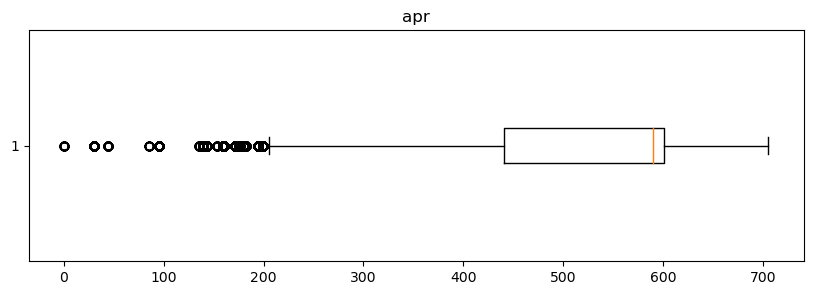

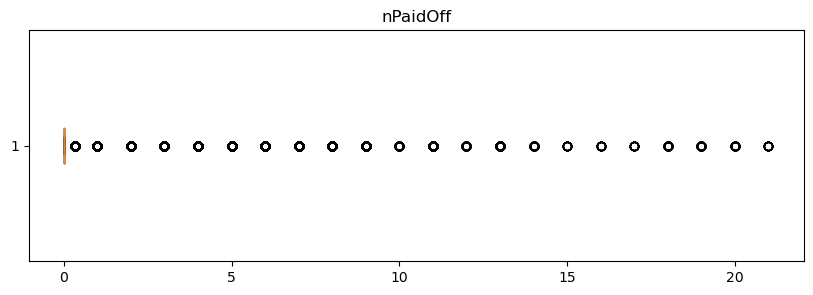

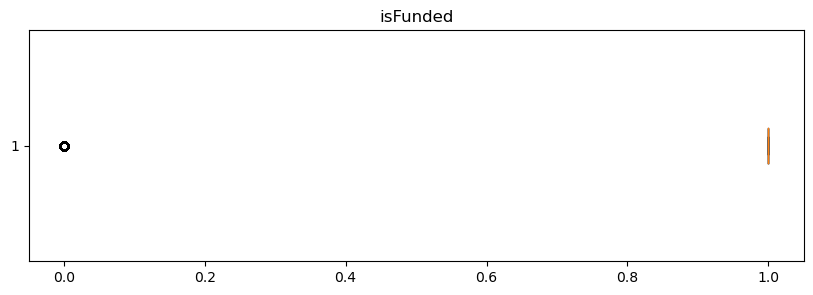

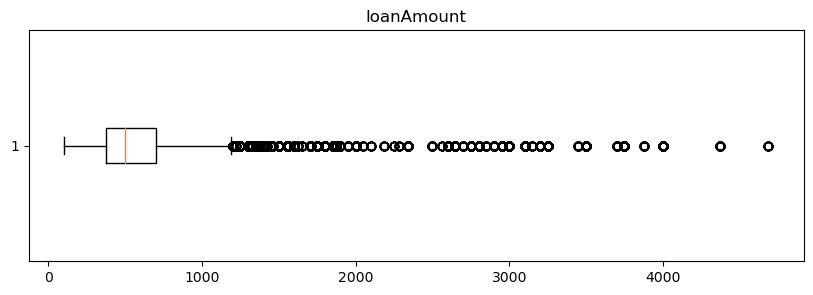

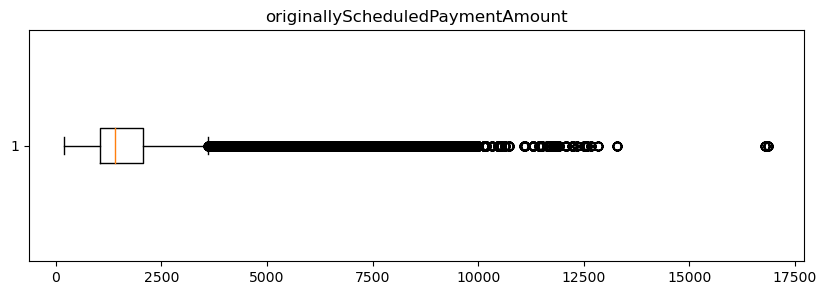

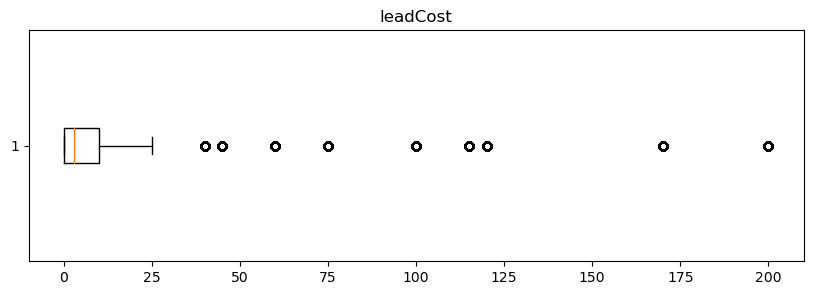

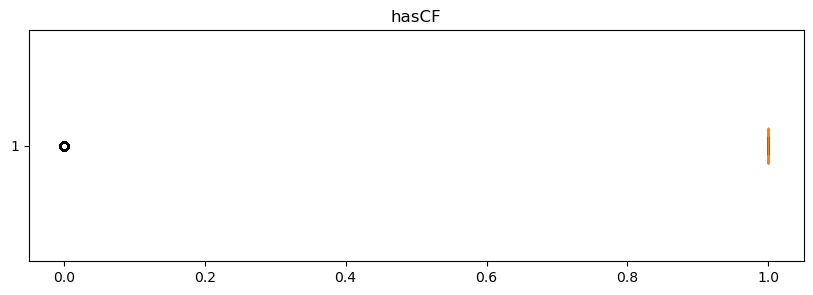

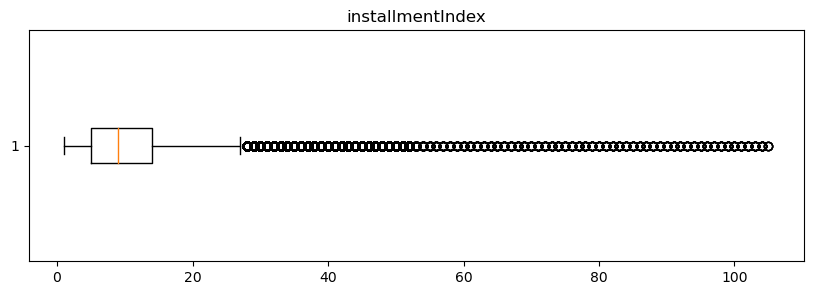

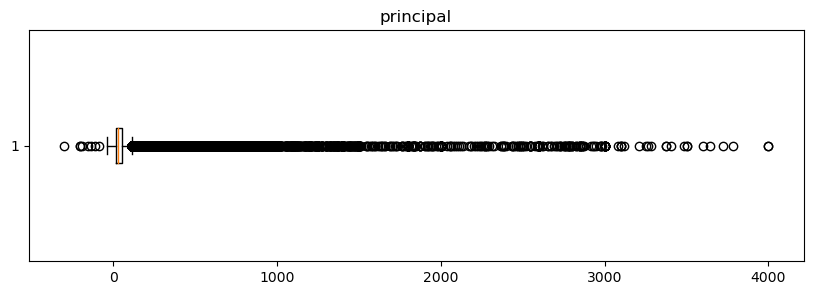

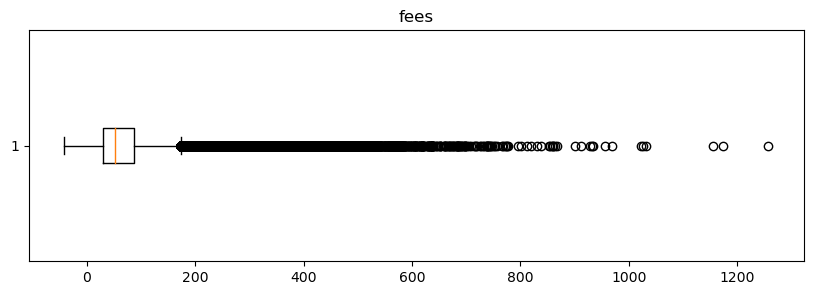

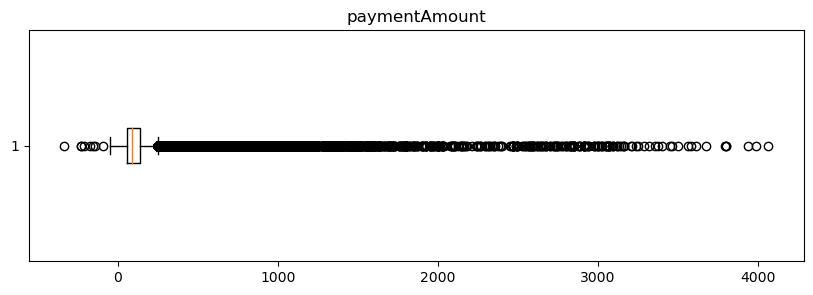

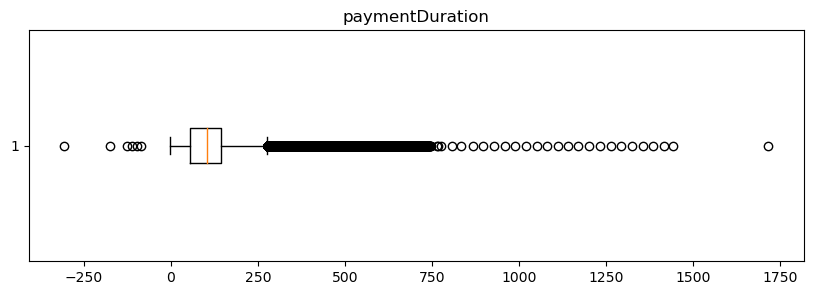

In [ ]:
data = combined_df[numeric_column]

for col in data:
    fig = plt.figure(figsize = (10,3))
    plt.boxplot(combined_df[col],vert=False)
    plt.title(col)
    plt.show()

In [16]:
def outlier_handler(data):
    q1 = data.quantile(.25)
    q3 = data.quantile(.75)
    data = data.apply(lambda x : q1 if x < q1 else (q3 if x > q3 else x))
    return data

for col in data:
    if col in ['hasCF','isFunded','nPaidOff']:
        continue
    combined_df[col] = outlier_handler(combined_df[col])

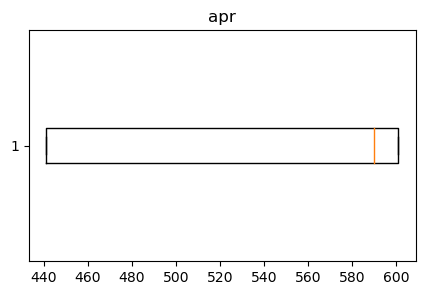

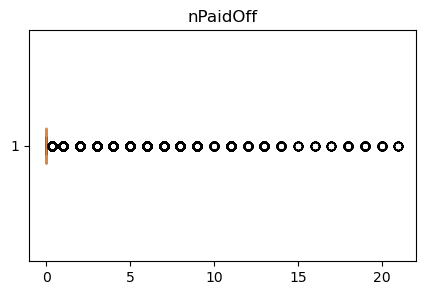

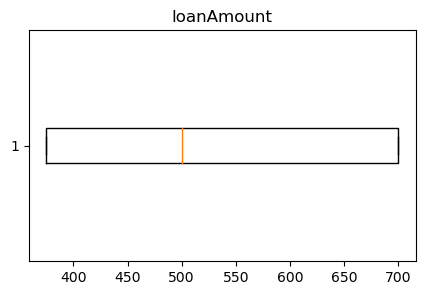

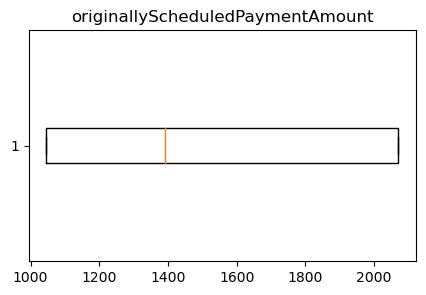

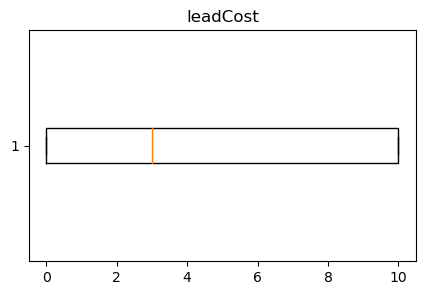

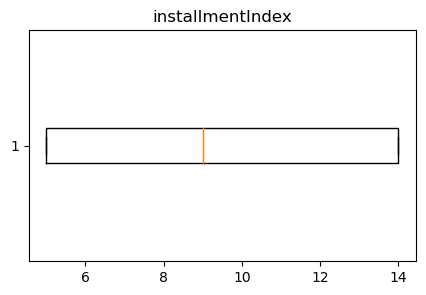

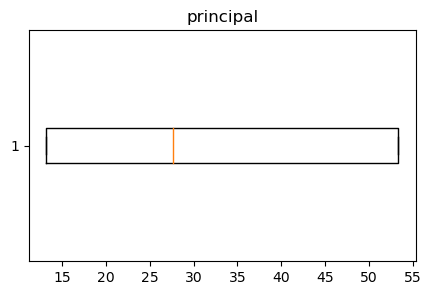

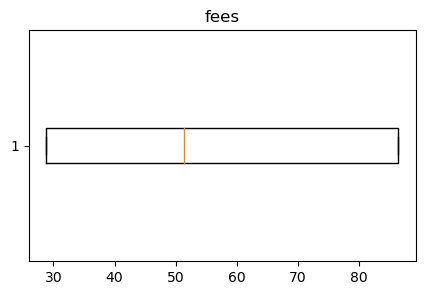

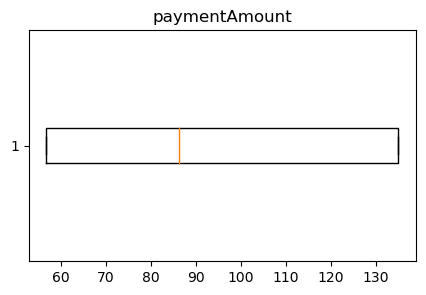

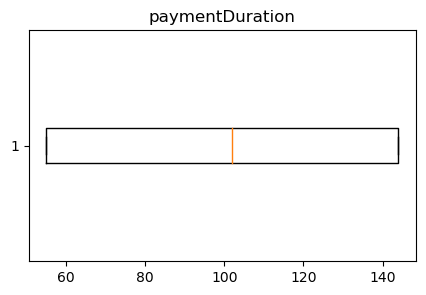

In [17]:

for col in data:
    if col in ['hasCF','isFunded']:
        continue
    fig = plt.figure(figsize = (5,3))
    plt.boxplot(combined_df[col],vert=False)
    plt.title(col)
    plt.show()

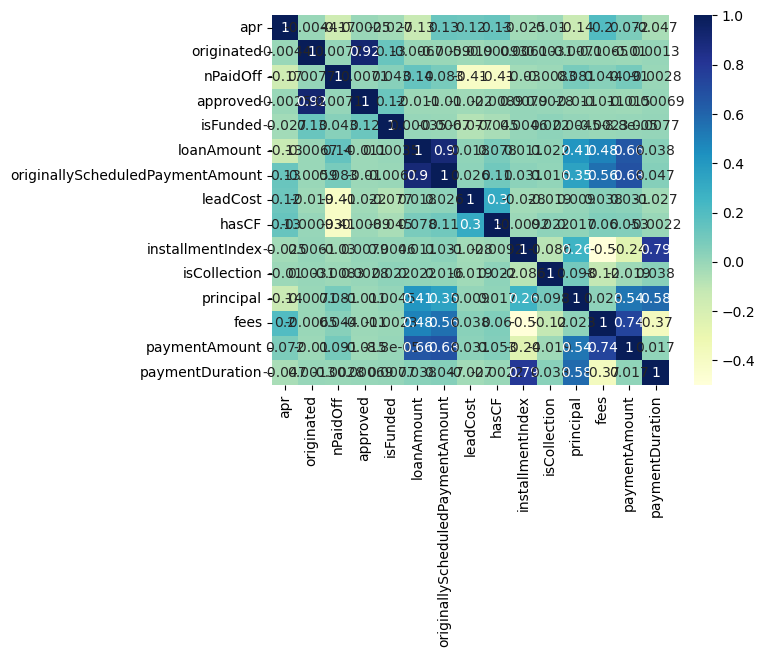

In [18]:
dataplot = sns.heatmap(combined_df.corr(numeric_only=True), cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
feature = combined_df.drop(columns=['hasCF'])

for col in feature.columns:
    if feature[col].dtype == 'int64' or feature[col].dtype == 'float64':
        continue
    contingency_table = pd.crosstab(feature[col], loan_df['hasCF'])
    #print(f"Contingency Table for {col}:\n{contingency_table}\n")

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}, Chi-Square: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")



loanId, Chi-Square: 271892.2505864106, p-value: 0.36222195799304213, Degrees of Freedom: 271633
payFrequency, Chi-Square: 6.033832886391189, p-value: 0.1966358203298482, Degrees of Freedom: 4
applicationDate, Chi-Square: 271877.2352972912, p-value: 0.3632437358585202, Degrees of Freedom: 271620
originated, Chi-Square: 1.616214993970108e-07, p-value: 0.9996792330493759, Degrees of Freedom: 1
originatedDate, Chi-Square: 21948.012703310982, p-value: 0.10023119814648497, Degrees of Freedom: 21681
approved, Chi-Square: 0.002293346475045781, p-value: 0.9618047879902818, Degrees of Freedom: 1
loanStatus, Chi-Square: 9.791608468088656, p-value: 0.9717951224178447, Degrees of Freedom: 20
state, Chi-Square: 33.624422275225335, p-value: 0.7865000966017798, Degrees of Freedom: 41
leadType, Chi-Square: 16.421169130662655, p-value: 0.0585906205662945, Degrees of Freedom: 9
fpStatus, Chi-Square: 9.735837315521229, p-value: 0.1362263791360687, Degrees of Freedom: 6
clarityFraudId, Chi-Square: 157301.5

<h2>Encoding</h2>

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            689364 non-null  object 
 1   payFrequency                      689364 non-null  object 
 2   apr                               689364 non-null  float64
 3   originated                        689364 non-null  bool   
 4   nPaidOff                          689364 non-null  float64
 5   approved                          689364 non-null  bool   
 6   isFunded                          689364 non-null  int64  
 7   loanStatus                        689364 non-null  object 
 8   loanAmount                        689364 non-null  float64
 9   originallyScheduledPaymentAmount  689364 non-null  float64
 10  state                             689364 non-null  object 
 11  leadType                          689364 non-null  o

In [28]:
categorical_column = [combined_df.select_dtypes(include=['object']).columns.tolist()][0]
print(categorical_column)

label = {}
for col in categorical_column:
    print(col)
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label[col] = le

['loanId', 'payFrequency', 'loanStatus', 'state', 'leadType', 'fpStatus', 'paymentStatus']
loanId
payFrequency
loanStatus
state
leadType
fpStatus
paymentStatus


In [29]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            689364 non-null  int32  
 1   payFrequency                      689364 non-null  int32  
 2   apr                               689364 non-null  float64
 3   originated                        689364 non-null  bool   
 4   nPaidOff                          689364 non-null  float64
 5   approved                          689364 non-null  bool   
 6   isFunded                          689364 non-null  int64  
 7   loanStatus                        689364 non-null  int32  
 8   loanAmount                        689364 non-null  float64
 9   originallyScheduledPaymentAmount  689364 non-null  float64
 10  state                             689364 non-null  int32  
 11  leadType                          689364 non-null  i

In [31]:
#remove loanId
combined_df = combined_df.drop(columns='loanId')

<h2>Data Splitting</h2>

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
print('no. of 1:',len(combined_df[combined_df['hasCF'] == 1]))
print('no. of 0:',len(combined_df[combined_df['hasCF'] == 0]))

#undersampling 1
healthy_indices = combined_df[combined_df['hasCF'] == 1].index
random_pos = np.random.choice(healthy_indices,int(len(combined_df[combined_df['hasCF'] == 0])),replace=False)
healthy_samples = combined_df.loc[random_pos]

#joined healthy_samples with 0
combined_df = pd.concat([combined_df[combined_df['hasCF'] == 0],healthy_samples],ignore_index=True,sort=False)

print(combined_df['hasCF'].unique())
print('no. of 1:',len(combined_df[combined_df['hasCF'] == 1]))
print('no. of 0:',len(combined_df[combined_df['hasCF'] == 0]))


no. of 1: 573812
no. of 0: 115552
[0 1]
no. of 1: 115552
no. of 0: 115552


In [34]:
X = combined_df.drop(columns=['hasCF'])
Y = combined_df['hasCF']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,stratify=Y)

<h2>Model Training and Optimizing</h2>

In [ ]:
from pyswarms.single.global_best import GlobalBestPSO
from sklearn.metrics import f1_score

In [37]:
def pso_objective_function(hyperparameters):
    f1_scores = []
    #some of the numerical hyperparameters for lightGBM
    num_leaves, max_depth, learning_rate, n_estimators = hyperparameters.T

    for leaves, depth, lr, estimators in zip(num_leaves, max_depth, learning_rate, n_estimators):
        params = {
            'num_leaves': int(leaves),
            'max_depth': int(depth),
            'learning_rate': lr,
            'n_estimators': int(estimators),
        }

        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

        model = lgb.LGBMClassifier(**params)
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
        f1 = f1_score(y_test, y_pred, average='macro')
        f1_scores.append(f1)

    return -np.array(f1_scores)

In [38]:
bounds = (
    [10, 3, 0.01, 50],
    [100, 20, 0.5, 300]
)

optimizer = GlobalBestPSO(
    n_particles=10,
    dimensions=4,
    options={'c1': 1.5, 'c2': 1.5, 'w': 0.9},
    bounds=bounds
)

best_cost, best_hyperparameters = optimizer.optimize(pso_objective_function, iters=30)
print("Best hyperparameters:", best_hyperparameters)

2024-12-08 18:52:36,877 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/30

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

pyswarms.single.global_best:   3%|▎         |1/30, best_cost=-0.967

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info

pyswarms.single.global_best:   7%|▋         |2/30, best_cost=-0.968

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

pyswarms.single.global_best:  10%|█         |3/30, best_cost=-0.968

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

pyswarms.single.global_best:  13%|█▎        |4/30, best_cost=-0.97 

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

pyswarms.single.global_best:  17%|█▋        |5/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  20%|██        |6/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  23%|██▎       |7/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info

pyswarms.single.global_best:  27%|██▋       |8/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  30%|███       |9/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

pyswarms.single.global_best:  33%|███▎      |10/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  37%|███▋      |11/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  40%|████      |12/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  43%|████▎     |13/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data po

pyswarms.single.global_best:  47%|████▋     |14/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

pyswarms.single.global_best:  50%|█████     |15/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info

pyswarms.single.global_best:  53%|█████▎    |16/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  57%|█████▋    |17/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  60%|██████    |18/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  63%|██████▎   |19/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

pyswarms.single.global_best:  67%|██████▋   |20/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

pyswarms.single.global_best:  70%|███████   |21/30, best_cost=-0.97

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, num

pyswarms.single.global_best:  73%|███████▎  |22/30, best_cost=-0.97

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

pyswarms.single.global_best:  77%|███████▋  |23/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  80%|████████  |24/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info

pyswarms.single.global_best:  83%|████████▎ |25/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

pyswarms.single.global_best:  87%|████████▋ |26/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

pyswarms.single.global_best:  90%|█████████ |27/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best:  93%|█████████▎|28/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info

pyswarms.single.global_best:  97%|█████████▋|29/30, best_cost=-0.97

[LightGBM] [Info] Number of positive: 92442, number of negative: 92441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000011
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] 

pyswarms.single.global_best: 100%|██████████|30/30, best_cost=-0.97
2024-12-08 18:58:10,727 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9696130565450116, best pos: [9.13789802e+01 1.47655637e+01 1.98460355e-01 2.97534942e+02]


Best hyperparameters: [9.13789802e+01 1.47655637e+01 1.98460355e-01 2.97534942e+02]


In [39]:
print(best_hyperparameters)
print(best_hyperparameters[0].astype(int))
print(best_hyperparameters[1].astype(int))
print(best_hyperparameters[2])
print(best_hyperparameters[3].astype(int))

[9.13789802e+01 1.47655637e+01 1.98460355e-01 2.97534942e+02]
91
14
0.19846035491160524
297


In [40]:
final_model = lgb.LGBMClassifier(
    num_leaves=best_hyperparameters[0].astype(int),
    max_depth=best_hyperparameters[1].astype(int),
    learning_rate=best_hyperparameters[2],
    n_estimators=best_hyperparameters[3].astype(int),
)

lgbDataset = lgb.Dataset(x_train,label=y_train)
final_model.fit(x_train,y_train)

y_test_pred = final_model.predict(x_test)
f1 = f1_score(y_test, y_test_pred, average='macro')  # Adjust average as needed
print("\nFinal F1 Score:", f1)

[LightGBM] [Info] Number of positive: 92441, number of negative: 92442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 184883, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000011
[LightGBM] [Info] Start training from score -0.000011

Final F1 Score: 0.9684216962087987
